In [3]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))
sys.path.append(str(PROJECT_ROOT / "src"))

In [4]:
from src.data.datamodule import MNISTDataModule

dm = MNISTDataModule(batch_size=64, num_workers=0, data_dir=(PROJECT_ROOT / "data")) # type: ignore
dm.prepare_data()
dm.setup()

batch = next(iter(dm.train_dataloader()))
imgs, labels = batch
imgs.shape, labels.shape

/workspaces/zum_mnist_mk/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(torch.Size([64, 1, 28, 28]), torch.Size([64]))

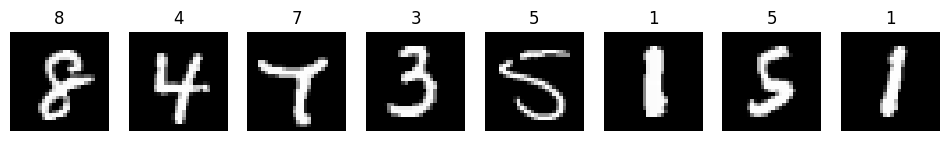

In [22]:
import matplotlib.pyplot as plt

def show_examples(imgs, labels, n=8):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(imgs[i, 0].cpu(), cmap="gray")
        plt.title(str(labels[i].item()))
        plt.axis("off")
    plt.show()

show_examples(imgs, labels)

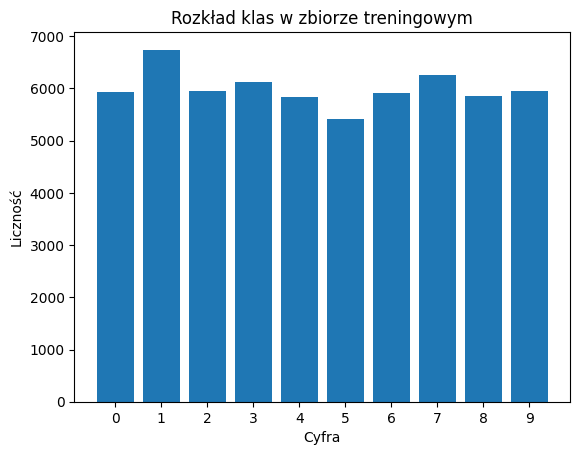

In [23]:
from collections import Counter
from torch.utils.data import ConcatDataset

full_train = ConcatDataset([dm.train_set, dm.val_set])

labels_all = [int(y) for _, y in full_train]
cnt = Counter(labels_all)

plt.bar(cnt.keys(), cnt.values())
plt.xticks(range(10))
plt.xlabel("Cyfra")
plt.ylabel("Liczność")
plt.title("Rozkład klas w zbiorze treningowym")
plt.show()